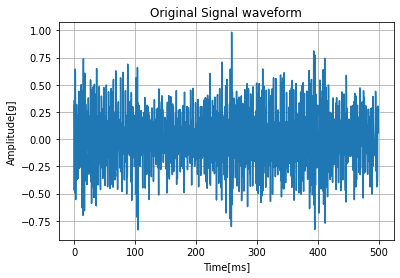

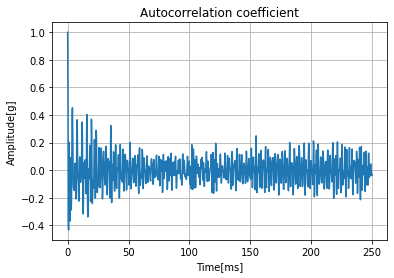

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading data 
data = pd.read_csv('Z.csv',sep=';')

# Autocorrelation function calculation

df = data['amplitude']
N= len(df)
y=[]
for j in range(0,(int(N/2)+1)):
    R=0    
    for i in range(0,(int(N/2))):
        R = R+ df[i]*df[i+j]
    y.append(R*2/N)
    
# Autocorrelation coefficient calculation

df = pd.DataFrame(y)
df.columns =['R']
R0=df.iloc[0,0]
R0
df['A'] = df['R']/R0
dt = data['time']
t=[]
for i in range(len(df)):
    t.append(dt[i])
    
df['t']=t
# Plot waveform signal
fig = plt.figure(0)
x=data["time"]
y=data["amplitude"]
plt.plot(x,y)
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[g]")
plt.title("Original Signal waveform")
fig.savefig("Signal wave form.png")
plt.grid()
# Plot figure of Autocorrelation coefficient
fig1 = plt.figure(1)
x1=df["t"]
y1=df["A"]
plt.plot(x1,y1)
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[g]")
plt.title("Autocorrelation coefficient")
fig1.savefig("Autocorrelation coefficient.png")
plt.grid()

In [2]:
data.shape

(2048, 3)